In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import scipy.stats as stats# for qq plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [14]:
df=pd.read_csv('C:\\Users\\pshah\\Desktop\\ml_ krishniyak\\data_set\\titanic.csv',usecols=['Age','Fare','Survived'])

In [15]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\pshah\AppData\Local\Temp\ipykernel_5436\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [17]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [18]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

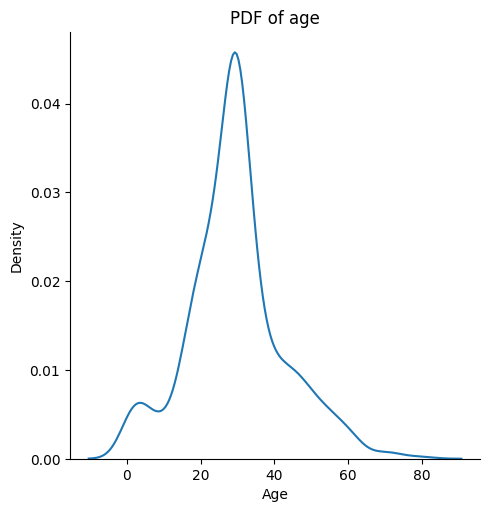

In [25]:
sns.displot(x_train['Age'],kind='kde')
plt.title('PDF of age')
plt.show()

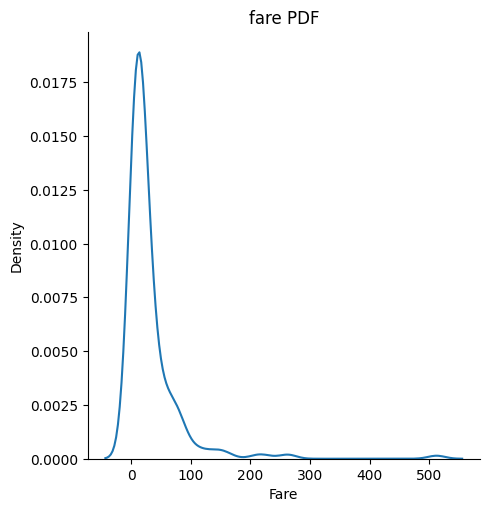

In [28]:
sns.displot(x_train['Fare'],kind='kde')
plt.title('fare PDF')
plt.show()

#### from the above two fig. we can see that fare is skwed right so we can use the log transform on it to make it noraml dristribution 

In [29]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [30]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred=clf1.predict(x_test)
y_pred1=clf2.predict(x_test)

In [33]:
print('accuracy score of LR',accuracy_score(y_test,y_pred))
print('accuracy score of DT',accuracy_score(y_test,y_pred1))

accuracy score of LR 0.6576271186440678
accuracy score of DT 0.6406779661016949


### now we will do the transforamtion and see the result


In [34]:
trf=FunctionTransformer(func=np.log1p)

In [35]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [37]:
clf1.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

DecisionTreeClassifier()

In [39]:
y_pred=clf1.predict(x_test_trf)
y_pred1=clf2.predict(x_test_trf)

In [40]:
print('accuracy of LR after log transform',accuracy_score(y_test,y_pred))
print('accuracy of DT after log transform',accuracy_score(y_test,y_pred1))

accuracy of LR after log transform 0.6847457627118644
accuracy of DT after log transform 0.6305084745762712


### so wwe can see that after the transform of data accuracy of the model have increased